# Model of elementary school  2019

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [3]:
df = pd.read_csv('../data/3-oro/Merge_2019_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467110 entries, 0 to 467109
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 117.6+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,99,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,100,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


In [6]:
df["POB_VICT_CONF"].value_counts()

99    450622
1      14998
9        950
3        247
2        109
4        101
10        74
20         5
17         2
6          1
18         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

In [9]:
df['GRADO_OVERAGE'] = (-1)*df['GRADO_OVERAGE'] + 100

In [10]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,0,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,0,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


## Initial Variables

In [11]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [12]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.423956
3    0.383991
4    0.136013
1    0.056040
Name: NIVEL, dtype: float64

In [13]:
df = df[(df['NIVEL']== 2)]

In [14]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    0.973611
9    0.026389
Name: CODIGO_METODOLOGIA, dtype: float64

In [15]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

In [16]:
df['REPITENTE'].value_counts()/(df.shape[0])

0    0.961978
1    0.038022
Name: REPITENTE, dtype: float64

In [17]:
df['REPITENTE'].value_counts()

0    185477
1      7331
Name: REPITENTE, dtype: int64

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Independent$$
$$ H_{a}: The \: variables \:are \: not \: Independent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [18]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
              Category        p-value
4    DIR_NUM_LOCALIDAD  1.677838e-270
0               GENERO   7.537762e-37
2    TIPO_DISCAPACIDAD   2.444873e-18
7           computador   4.710577e-14
6              teneviv   2.409088e-11
3       CODIGO_JORNADA   8.621747e-08
1        POB_VICT_CONF   1.976335e-04
9          ES_BILINGUE   2.120649e-04
8           tiene_auto   3.163257e-04
5  todos_servicios_Pub   4.798505e-02


In [19]:
categorias = cat_dep

In [20]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

## Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.



#### Box Tidwell Test
First we perform a standard Logistic regression over alla variables to capture the differences.

In [21]:
y = df['REPITENTE']
y.shape

(192808,)

In [22]:
X = df[variables]
X.shape

(192808, 13)

In [23]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


When running a Logistic regression it is good practice to add a column of ones. See this [reference](https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept) for a nice explanation of why.

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                            GLM   Df Residuals:                   192794
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29853.
Date:                Wed, 06 Jul 2022   Deviance:                       59707.
Time:                        23:54:04   Pearson chi2:                 1.85e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1283      0.007     17.446      0.000       0.114       0.143
estrato                       0.0947      0.020      4.640      0.000       0.055       0.135
puntaje_sisben_3             -0.0063      0.001     -7.629      0.000      -0.008      -0.005
indice_hacinamiento           0.0349      0.010      3.557      0.000       0.016       0.054
TOTAL_EQUIPO_COMPUTO          0.0008   9.73e-05      8.708      0.000       0.001       0.001
ALUMN_POR_DOCENTE             0.0170      0.003      5.198      0.000       0.011       0.023
COMPU_POR_ALUMN              -1.2280      0.150     -8.209      0.000      -1.521      -0.935
TOTAL_DOCENTES_CON_TITULO    -0.0034      0.001     -6.649      0.000      -0.004      -0.002
PROP_DOCENTES_CON_TITULO     -0.8067      0.050    -15.999      0.000      -0.905      -0.708
promepuntaje                 -0.0018      0.001     -1.870      0.062      -0.004    8.48e-05
GRADO_OVERAGE                 0.0284      0.001     26.516      0.000       0.026       0.030
nparentes                     0.0004      0.011      0.037      0.970      -0.020       0.021
tpersona                      0.0360      0.006      5.561      0.000       0.023       0.049
const                        -4.0670      0.255    -15.935      0.000      -4.567      -3.567
=============================================================================================
"""

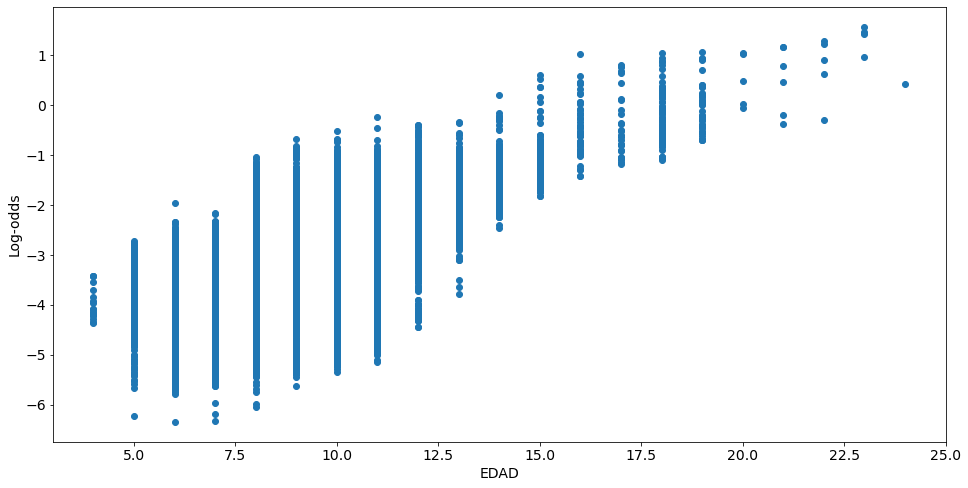

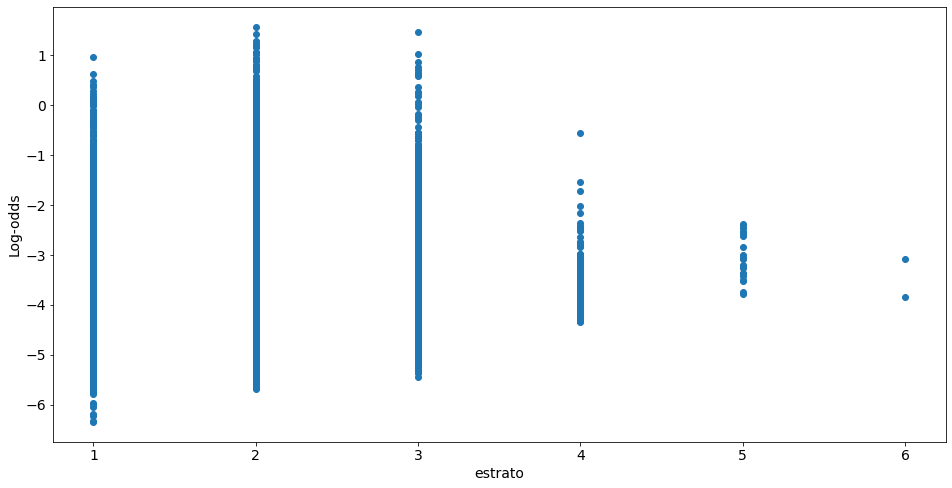

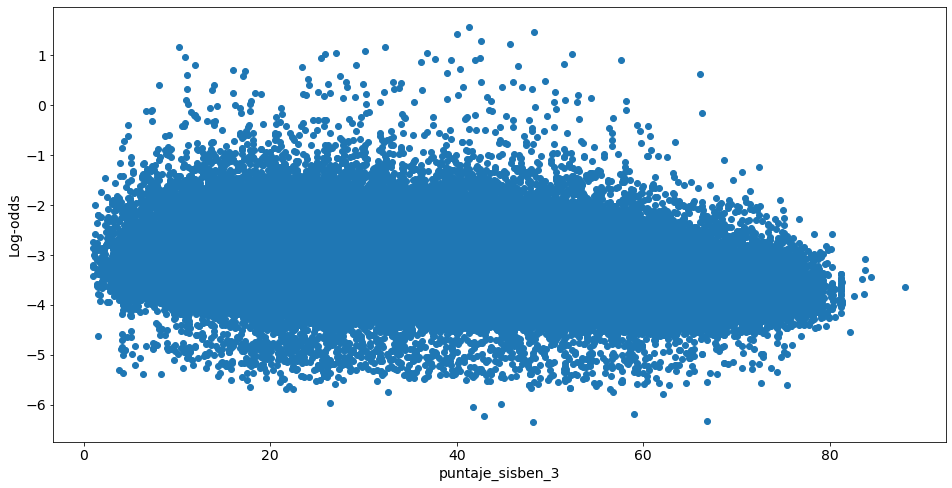

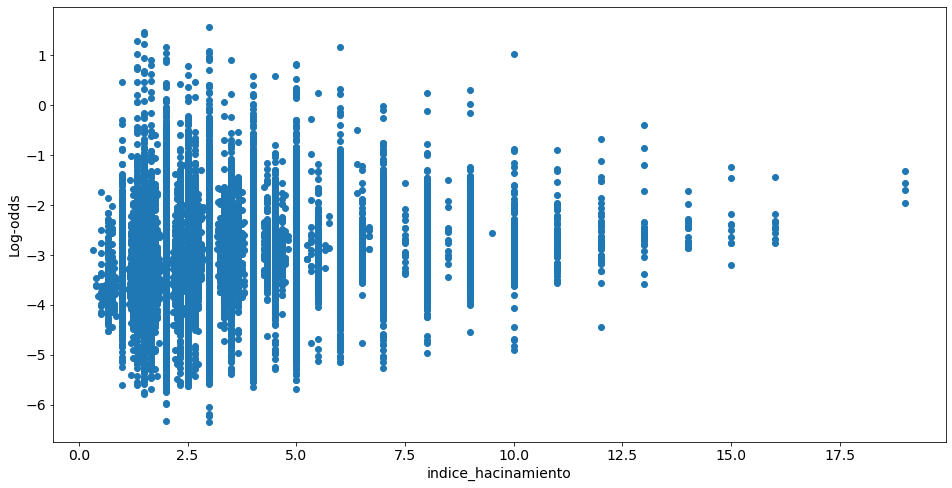

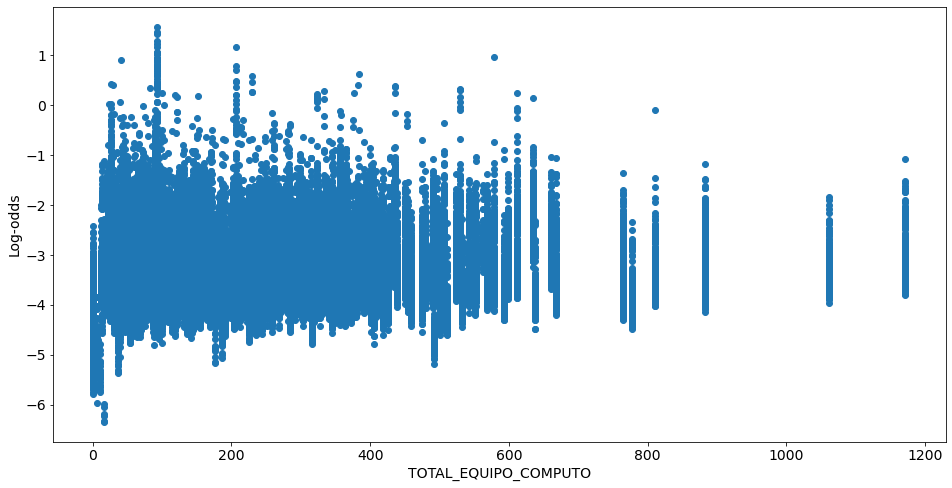

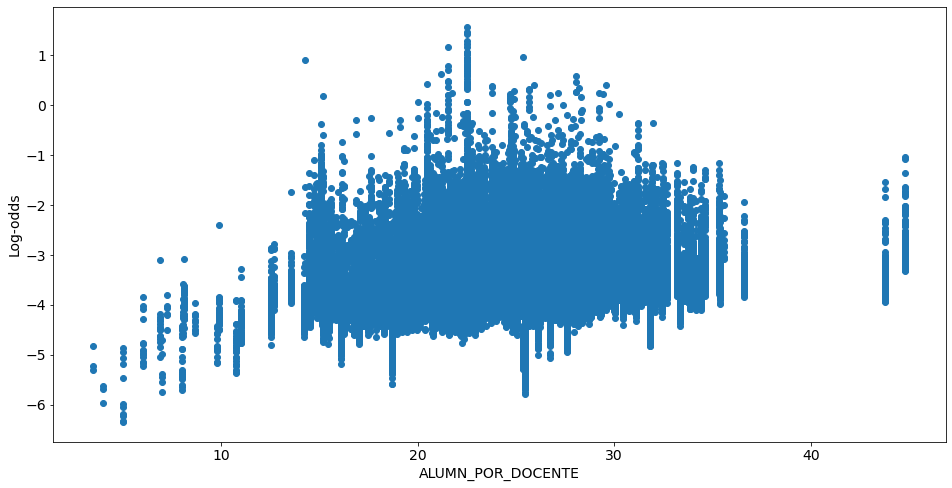

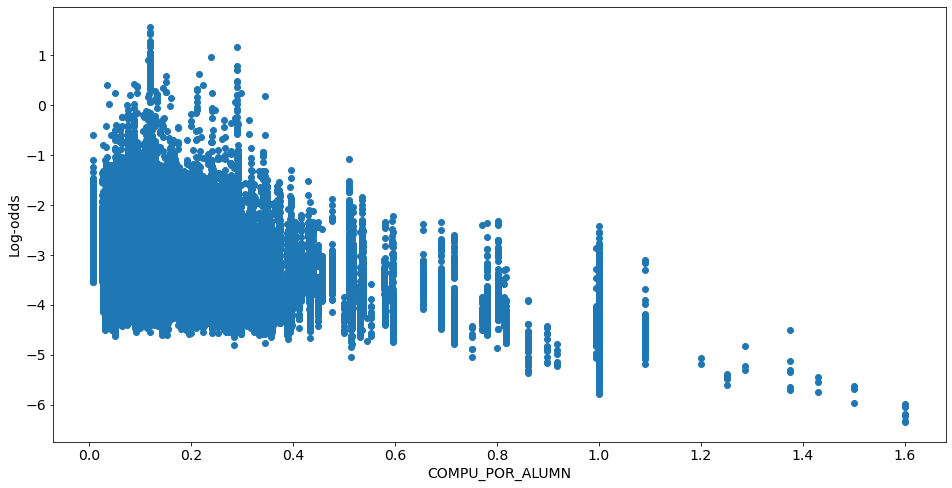

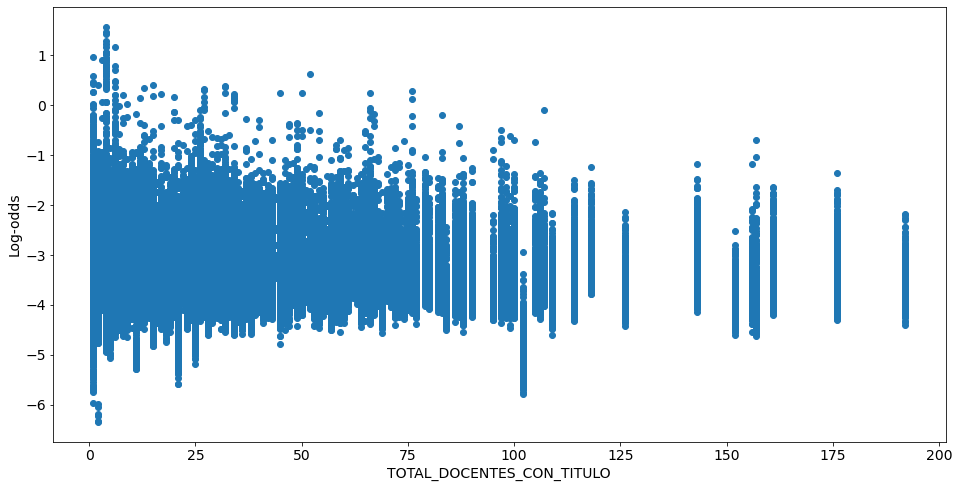

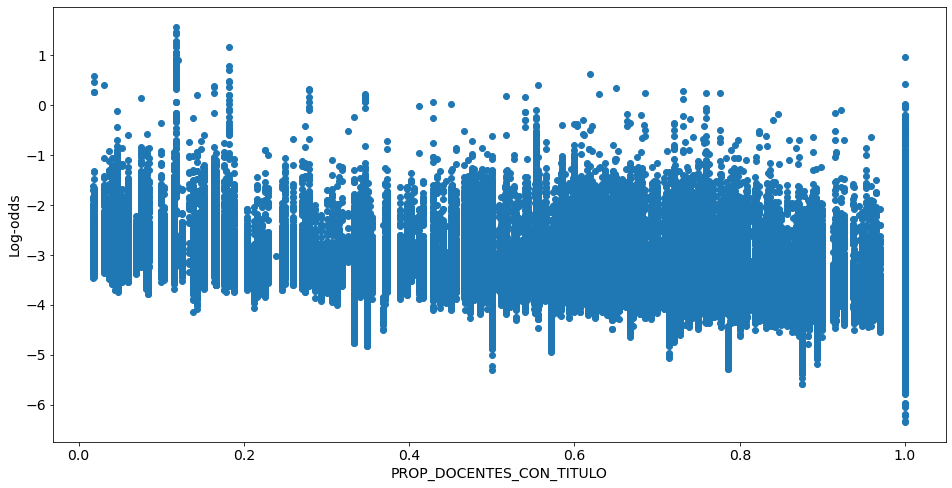

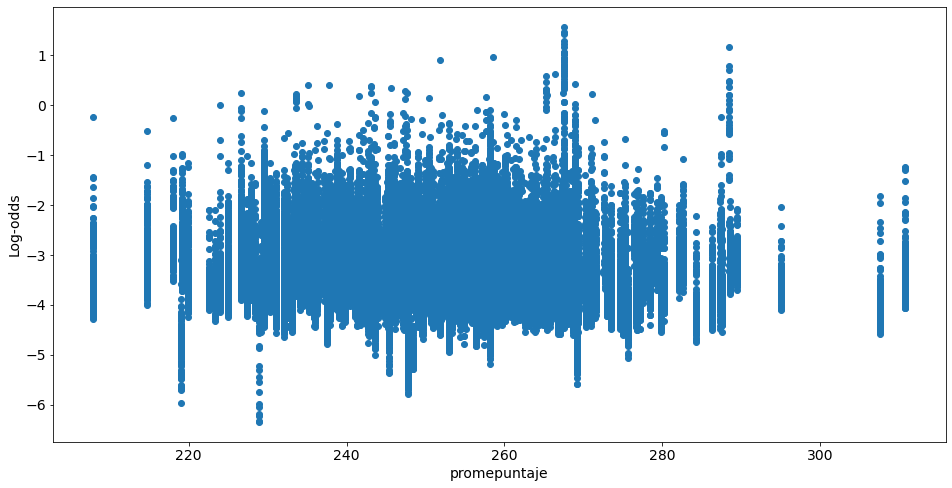

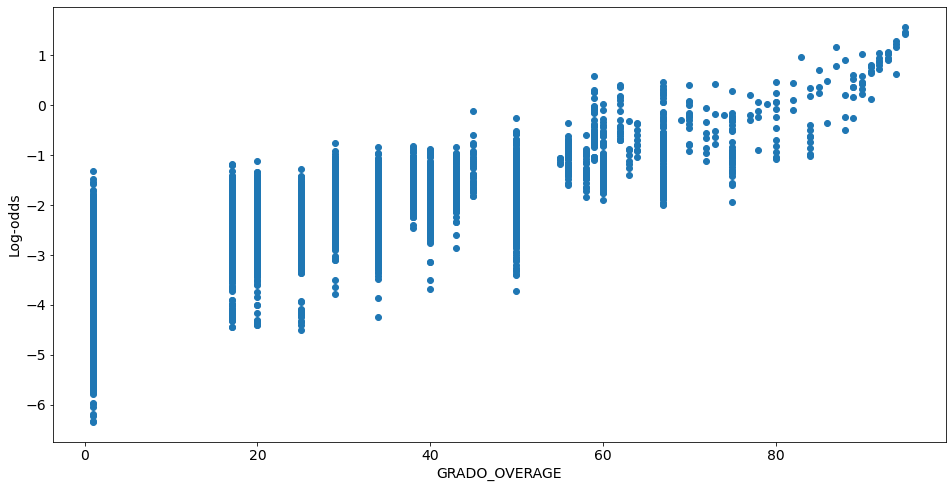

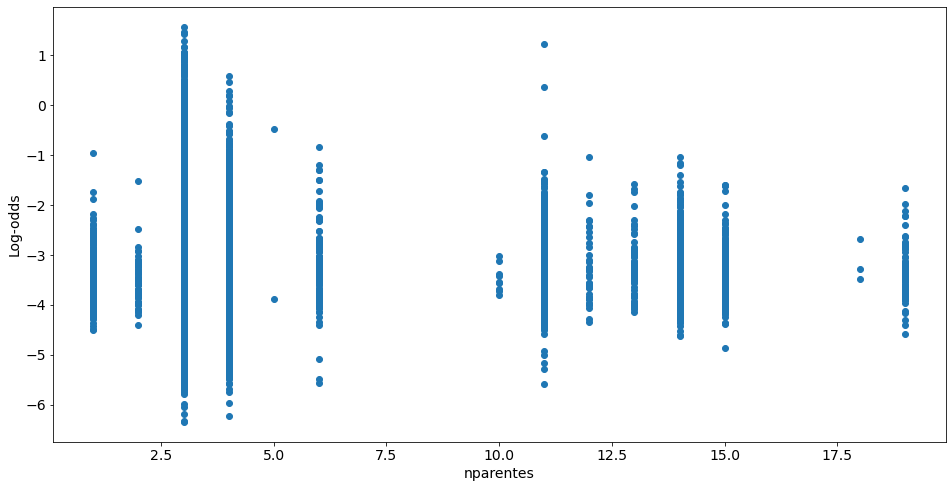

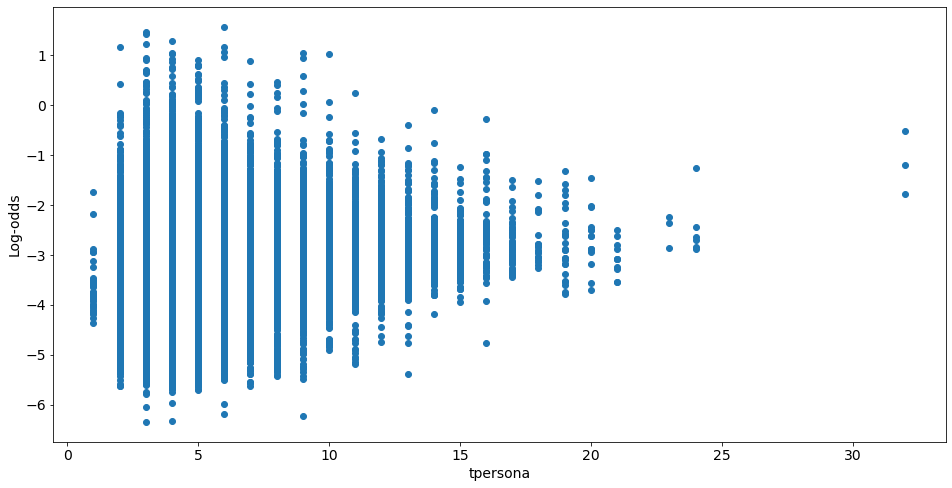

In [26]:
predicted = logit_results.predict(X_cons)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
for var in variables:
    plt.scatter(x=X_cons[var].values, y=log_odds)
    plt.xlabel(f"{var}")
    plt.ylabel("Log-odds")
    plt.show()
    

#### Box Tidwell with the added variables

In [27]:
y = df['REPITENTE']
X = df[variables]

# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)


for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-27-7718e828fc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [28]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [29]:
X_cons = sm.add_constant(X, prepend=False)

In [30]:
## Should not print anything, otherwise an error will raise in the test
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [31]:
## Should not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [32]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                            GLM   Df Residuals:                   192781
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29228.
Date:                Wed, 06 Jul 2022   Deviance:                       58457.
Time:                        23:54:20   Pearson chi2:                 2.02e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        2.1336      0.168     12.732      0.000       1.805       2.462
estrato                                                     1.6331      0.161     10.155      0.000       1.318       1.948
puntaje_sisben_3                                            0.0015      0.014      0.110      0.912      -0.025       0.028
indice_hacinamiento                                         0.1612      0.068      2.357      0.018       0.027       0.295
TOTAL_EQUIPO_COMPUTO                                        0.0222      0.002     14.064      0.000       0.019       0.025
ALUMN_POR_DOCENTE                                          -0.8942      0.082    -10.889      0.000      -1.055      -0.733
COMPU_POR_ALUMN                                            -1.8709      0.188     -9.964      0.000      -2.239      -1.503
TOTAL_DOCENTES_CON_TITULO                                   0.0042      0.005      0.829      0.407      -0.006       0.014
PROP_DOCENTES_CON_TITULO                                   -0.1200      0.089     -1.352      0.176      -0.294       0.054
promepuntaje                                               -0.3631      0.125     -2.895      0.004      -0.609      -0.117
GRADO_OVERAGE                                               0.1770      0.010     18.121      0.000       0.158       0.196
nparentes                                                   0.1140      0.132      0.866      0.386      -0.144       0.372
tpersona                                                    0.1466      0.058      2.519      0.012       0.033       0.261
EDAD:Log_EDAD                                              -0.6392      0.053    -12.154      0.000      -0.742      -0.536
estrato:Log_estrato                                        -0.9388      0.099     -9.462      0.000      -1.133      -0.744
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0016      0.003     -0.546      0.585      -0.008       0.004
indice_hacinamiento:Log_indice_hacinamiento                -0.0548      0.028     -1.928      0.054      -0.110       0.001
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0031      0.000    -13.311      0.000      -0.004      -0.003
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                     0.2121      0.019     10.953      0.000       0.174       0.250
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         1.3823      0.301      4.594      0.000       0.793       1.972
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO    -0.0027      0.001     -2.756      0.006      -0.005      -0.001
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -2.0404      0.191    -10.704      0.000      -2

In [33]:
logit_results.pvalues[logit_results.pvalues > 0.05]

puntaje_sisben_3                               0.912449
TOTAL_DOCENTES_CON_TITULO                      0.407296
PROP_DOCENTES_CON_TITULO                       0.176274
nparentes                                      0.386482
puntaje_sisben_3:Log_puntaje_sisben_3          0.584790
indice_hacinamiento:Log_indice_hacinamiento    0.053889
nparentes:Log_nparentes                        0.398046
const                                          0.243882
dtype: float64

In [34]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['puntaje_sisben_3', 'TOTAL_DOCENTES_CON_TITULO',
       'PROP_DOCENTES_CON_TITULO', 'nparentes',
       'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'nparentes:Log_nparentes', 'const'],
      dtype='object')

In [35]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['puntaje_sisben_3', 'indice_hacinamiento', 'nparentes']

In [36]:
# We will set our new variables as conti after running the sme test with another numeric algorithm (Newton)
len(variables)-len(conti)

10

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [37]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [38]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ EDAD + EDAD : np.log(EDAD) + estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + TOTAL_EQUIPO_COMPUTO + TOTAL_EQUIPO_COMPUTO : np.log(TOTAL_EQUIPO_COMPUTO) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN) + TOTAL_DOCENTES_CON_TITULO + TOTAL_DOCENTES_CON_TITULO : np.log(TOTAL_DOCENTES_CON_TITULO) + PROP_DOCENTES_CON_TITULO + PROP_DOCENTES_CON_TITULO : np.log(PROP_DOCENTES_CON_TITULO) + promepuntaje + promepuntaje : np.log(promepuntaje) + GRADO_OVERAGE + GRADO_OVERAGE : np.log(GRADO_OVERAGE) + nparentes + nparentes : np.log(nparentes) + tpersona + tpersona : np.log(tpersona)'

In [39]:
X_cons = X_cons.iloc[:,0:len(variables)]

In [40]:
X_cons['REPITENTE'] = y

In [41]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.151593
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                          Logit   Df Residuals:                   192781
Method:                           MLE   Df Model:                           26
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                 0.06196
Time:                        23:54:25   Log-Likelihood:                -29228.
converged:                       True   LL-Null:                       -31159.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       5.6878      4.881      1.165      0.244      -3.879      15.254
EDAD                                                            2.1336      0.168     12.732      0.000       1.805       2.462
EDAD:np.log(EDAD)                                              -0.6392      0.053    -12.154      0.000      -0.742      -0.536
estrato                                                         1.6331      0.161     10.155      0.000       1.318       1.948
estrato:np.log(estrato)                                        -0.9388      0.099     -9.462      0.000      -1.133      -0.744
puntaje_sisben_3                                                0.0015      0.014      0.110      0.913      -0.025       0.028
puntaje_sisben_3:np.log(puntaje_sisben_3)                      -0.0016      0.003     -0.546      0.585      -0.008       0.004
indice_hacinamiento                                             0.1613      0.068      2.358      0.018       0.027       0.295
indice_hacinamiento:np.log(indice_hacinamiento)                -0.0548      0.028     -1.929      0.054      -0.110       0.001
TOTAL_EQUIPO_COMPUTO                                            0.0222      0.002     14.064      0.000       0.019       0.025
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)              -0.0031      0.000    -13.311      0.000      -0.004      -0.003
ALUMN_POR_DOCENTE                                              -0.8942      0.082    -10.889      0.000      -1.055      -0.733
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)                     0.2121      0.019     10.953      0.000       0.174       0.250
COMPU_POR_ALUMN                                                -1.8709      0.188     -9.964      0.000      -2.239      -1.503
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)                         1.3823      0.301      4.594      0.000       0.793       1.972
TOTAL_DOCENTES_CON_TITULO                                       0.0042      0.005      0.829      0.407      -0.006       0.014
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)    -0.0027      0.001     -2.756      0.006      -0.005      -0.001
PROP_DOCENTES_CON_TITULO                                       -0.1200      0.089     -1.352      0.176      -0.294       0.054
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)      -2.0404      0.191    -10.704      0.000      -2.414      -1.667
promepuntaje                                                   -0.3631      0.125     -2.895      0.004      -0.609      -0.117
promepuntaje:np.log(promepuntaje)                               0.0558      0.019      2.911      0.004       0.018       0.093
GRADO_OVERAGE                                                   0.1770      0.010     18.121      0.000       0.158       0.196
GRADO_OVERAGE:np.log(GRADO_OVERAGE)      

In [42]:
model.pvalues[model.pvalues > 0.05]

Intercept                                          0.243895
puntaje_sisben_3                                   0.912521
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.584865
indice_hacinamiento:np.log(indice_hacinamiento)    0.053779
TOTAL_DOCENTES_CON_TITULO                          0.407289
PROP_DOCENTES_CON_TITULO                           0.176264
nparentes                                          0.386450
nparentes:np.log(nparentes)                        0.398015
dtype: float64

In [43]:
conti2 = []
for x in model.pvalues[model.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti2.append(aux[0])
conti2

['puntaje_sisben_3', 'indice_hacinamiento', 'nparentes']

In [44]:
# Should print empty set
set(conti)-set(conti2)

set()

-------------------------

#### Select CONT 1

In [45]:
# As we can see, both test give us the same results, so we decided to set variables = conti
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same [Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [46]:
# Performing a comparative analysis is possible to see that running outliers detection
#with or without categorical data produces the same results. 
all_variables = variables + categorias
y = df['REPITENTE']
X = df[variables]
X_cons = sm.add_constant(X, prepend=False)

In [47]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                            GLM   Df Residuals:                   192804
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31067.
Date:                Wed, 06 Jul 2022   Deviance:                       62134.
Time:                        23:54:26   Pearson chi2:                 1.93e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0071      0.001     -8.829      0.000      -0.009      -0.006
indice_hacinamiento     0.0519      0.009      5.798      0.000       0.034       0.069
nparentes               0.0040      0.010      0.385      0.700      -0.016       0.024
const                  -3.1434      0.060    -52.254      0.000      -3.261      -3.025
=======================================================================================
"""

In [48]:
# Get influence measures
influence = logit_results.get_influence()

In [49]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [50]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-50-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-50-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [51]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [52]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
387807,0.006483,5.494452
82353,0.006465,5.440812
353214,0.006305,5.010541
65299,0.005702,5.527745
371323,0.003848,3.960891


In [53]:
extreme.index

Int64Index([   411,   3363,   3555,   3627,   3650,   3651,   3660,   4160,
              4267,   4281,
            ...
            454926, 454939, 455136, 455161, 455414, 455440, 455545, 455770,
            455791, 458138],
           dtype='int64', length=7331)

In [54]:
df.index

Int64Index([   297,    298,    299,    305,    307,    308,    309,    310,
               311,    312,
            ...
            464805, 465049, 465757, 465764, 466865, 466875, 466878, 466881,
            466883, 466894],
           dtype='int64', length=192808)

In [55]:
df['REPITENTE'][df.index.isin(extreme.index)].value_counts()

1    7331
Name: REPITENTE, dtype: int64

In [56]:
index_rep = df['REPITENTE'][df['REPITENTE'] == 1].index

In [57]:
extreme.index.difference(index_rep)

Int64Index([], dtype='int64')

In [58]:
# Delete undesirable outliers that are NOT Positive REPITENTE
df = df.loc[~df.index.isin(extreme.index.difference(index_rep))]

In [59]:
df.index

Int64Index([   297,    298,    299,    305,    307,    308,    309,    310,
               311,    312,
            ...
            464805, 465049, 465757, 465764, 466865, 466875, 466878, 466881,
            466883, 466894],
           dtype='int64', length=192808)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-60-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


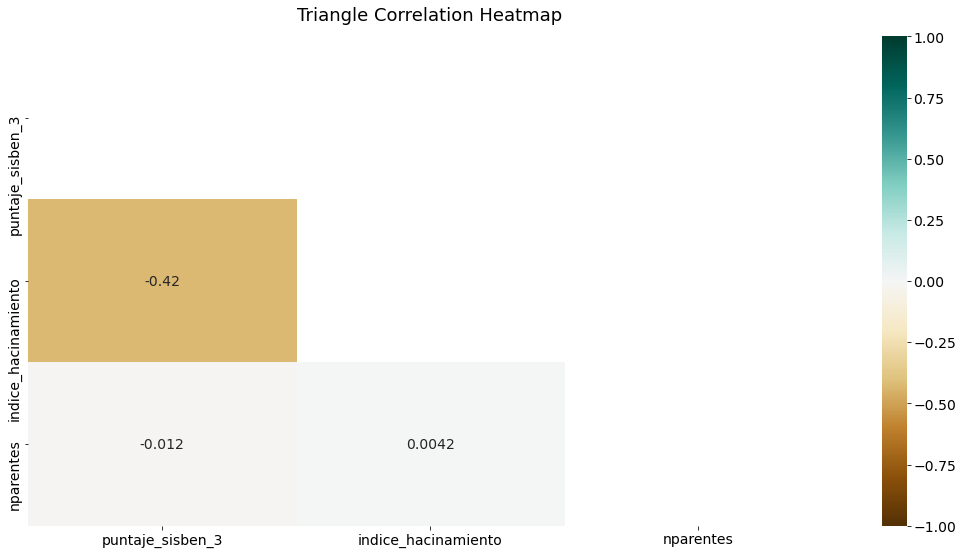

In [60]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,puntaje_sisben_3,4.000547
1,indice_hacinamiento,3.912305
2,nparentes,6.371503


In [62]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >10
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [63]:
variables

['nparentes', 'indice_hacinamiento', 'puntaje_sisben_3']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [64]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [65]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,6
2,TIPO_DISCAPACIDAD,4
1,POB_VICT_CONF,3
9,ES_BILINGUE,3
7,computador,2
8,tiene_auto,2
5,todos_servicios_Pub,1
6,teneviv,1
3,CODIGO_JORNADA,0
4,DIR_NUM_LOCALIDAD,0


In [66]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,6,TIPO_DISCAPACIDAD
2,TIPO_DISCAPACIDAD,4,POB_VICT_CONF
1,POB_VICT_CONF,3,ES_BILINGUE
9,ES_BILINGUE,3,computador
7,computador,2,tiene_auto
8,tiene_auto,2,todos_servicios_Pub
5,todos_servicios_Pub,1,teneviv
6,teneviv,1,CODIGO_JORNADA
3,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD
4,DIR_NUM_LOCALIDAD,0,NaN


In [67]:
independent = independent.reset_index()

In [68]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [69]:
vals.append(1)

In [70]:
independent['p_values'] = vals

In [71]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,6,TIPO_DISCAPACIDAD,7.001206e-69
1,2,TIPO_DISCAPACIDAD,4,POB_VICT_CONF,3.706665e-01
2,1,POB_VICT_CONF,3,ES_BILINGUE,6.276394e-01
3,9,ES_BILINGUE,3,computador,4.929726e-48
4,7,computador,2,tiene_auto,0.000000e+00
5,8,tiene_auto,2,todos_servicios_Pub,4.427059e-54
6,5,todos_servicios_Pub,1,teneviv,0.000000e+00
7,6,teneviv,1,CODIGO_JORNADA,3.037118e-45
8,3,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD,0.000000e+00
9,4,DIR_NUM_LOCALIDAD,0,NaN,1.000000e+00


In [72]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

0


In [73]:
cat_iid

['GENERO']

#### These 3 lines are just a reminder of the variables taking into account

In [74]:
categorias = cat_iid

In [75]:
variables = conti

In [76]:
variables = list(set(variables) - set(aux_multico))

In [77]:
variables

['nparentes', 'indice_hacinamiento', 'puntaje_sisben_3']

In [78]:
categorias

['GENERO']

------------------

# Run Models

In [79]:
# def formula_maker(dependiente, variables, categorias):
#     formula = f'{dependiente} ~ '
#     for variable in variables:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'{variable}'
#     for categoria in categorias:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'C({categoria})'
#     return formula  

In [80]:
# formula

In [81]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
# model.summary()

In [82]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
# model.summary()

## Model with selected variables

In [83]:
all_vars = variables + categorias
y1 = df['REPITENTE']
X1 = df[all_vars]

X_cons1 = sm.add_constant(X1, prepend=False)
X_cons1 = pd.get_dummies(X_cons1, columns=categorias, drop_first=True)
X_cons1.head(2)

,nparentes,indice_hacinamiento,puntaje_sisben_3,const,GENERO_1
297,3,3.5,42.310001,1.0,0
298,3,1.0,55.910000,1.0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cons1, y1, test_size=0.3)

In [85]:
model_1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               134965
Model:                            GLM   Df Residuals:                   134960
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21667.
Date:                Wed, 06 Jul 2022   Deviance:                       43334.
Time:                        23:54:33   Pearson chi2:                 1.35e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
nparentes              -0.0014      0.013     -0.108      0.914      -0.026       0.023
indice_hacinamiento     0.0474      0.011      4.411      0.000       0.026       0.068
puntaje_sisben_3       -0.0075      0.001     -7.739      0.000      -0.009      -0.006
const                  -3.2861      0.074    -44.232      0.000      -3.432      -3.141
GENERO_1                0.3357      0.029     11.569      0.000       0.279       0.393
=======================================================================================
"""

### Threshold selection

[Reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [86]:
y_probs1 = model_1.predict(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.037523, G-Mean=0.544


In [87]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [88]:
y_predict1 = y_probs1.apply(classi)

In [89]:
y_predict1.value_counts()

0    30546
1    27297
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_predict1)
print(confusion_matrix)

[[29567 26073]
 [  979  1224]]


<AxesSubplot:>

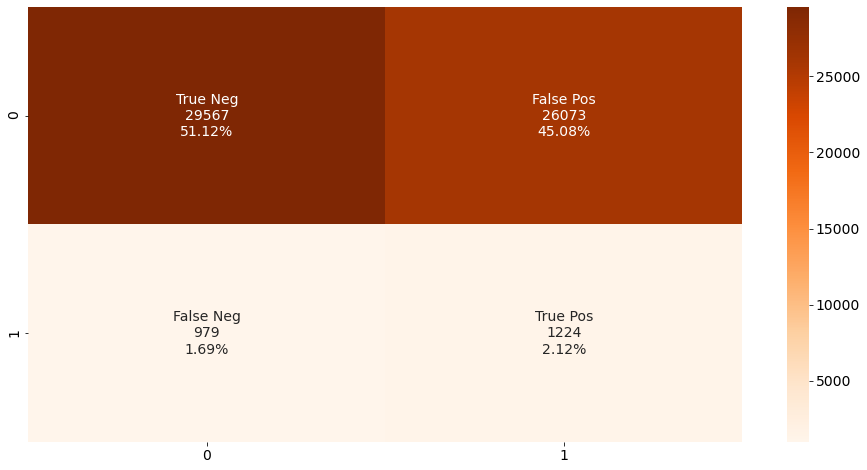

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.97      0.53      0.69     55640
           1       0.04      0.56      0.08      2203

    accuracy                           0.53     57843
   macro avg       0.51      0.54      0.38     57843
weighted avg       0.93      0.53      0.66     57843



## Model with weights

In [93]:
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [94]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [95]:
all_vars = variables + categorias
y2 = df['REPITENTE']
X2 = df[all_vars]

X_cons2 = sm.add_constant(X2, prepend=False)
X_cons2 = pd.get_dummies(X_cons2, columns=categorias, drop_first=True)
X_cons2.head(2)

,nparentes,indice_hacinamiento,puntaje_sisben_3,const,GENERO_1
297,3,3.5,42.310001,1.0,0
298,3,1.0,55.910000,1.0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cons2, y2, test_size=0.3)

In [97]:
pesos = y_train2.apply(pesos)

In [98]:
modelo_pesos = sm.GLM(y_train2, X_train2, family=sm.families.Binomial(), freq_weights=pesos).fit()
modelo_pesos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               134965
Model:                            GLM   Df Residuals:                  9858.25
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6781.7
Date:                Wed, 06 Jul 2022   Deviance:                       13563.
Time:                        23:54:35   Pearson chi2:                 9.86e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
nparentes               0.0088      0.018      0.493      0.622      -0.026       0.044
indice_hacinamiento     0.0609      0.016      3.834      0.000       0.030       0.092
puntaje_sisben_3       -0.0066      0.001     -4.799      0.000      -0.009      -0.004
const                  -0.1292      0.107     -1.213      0.225      -0.338       0.080
GENERO_1                0.2752      0.041      6.760      0.000       0.195       0.355
=======================================================================================
"""

In [99]:
y_probs2 = modelo_pesos.predict(X_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]


Best Threshold=0.497349, G-Mean=0.559


In [100]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [101]:
y_predict2 = y_probs2.apply(classi)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_predict2)
print(confusion_matrix)

[[30067 25566]
 [  935  1275]]


<AxesSubplot:>

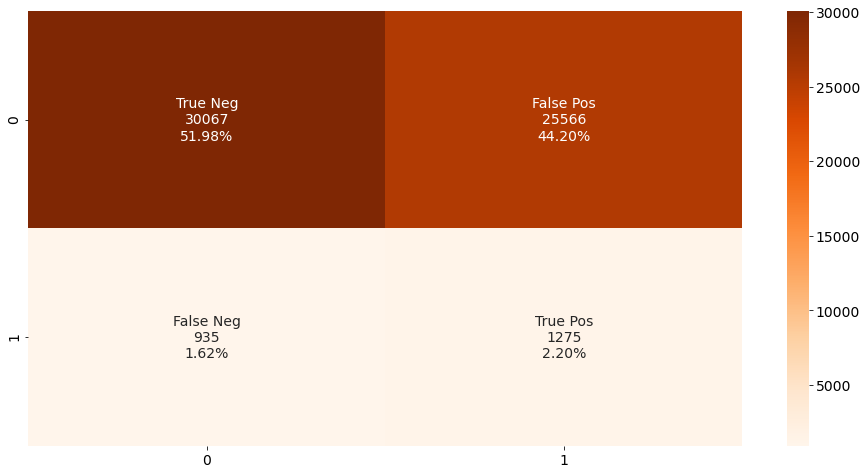

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69     55633
           1       0.05      0.58      0.09      2210

    accuracy                           0.54     57843
   macro avg       0.51      0.56      0.39     57843
weighted avg       0.93      0.54      0.67     57843



## Model with balanced dataset

In [105]:
df_repitentes = df[df['REPITENTE'] == 1]
df_no_repitentes = df[df['REPITENTE'] == 0].sample(n=df_repitentes.shape[0], random_state=145)
df_consolidado_frac = pd.concat([df_no_repitentes, df_repitentes])

In [106]:
all_vars = variables + categorias
y = df_consolidado_frac['REPITENTE']
X = df_consolidado_frac[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,nparentes,indice_hacinamiento,puntaje_sisben_3,const,GENERO_1
255028,3,4.0,25.910000,1.0,0
61794,3,5.5,37.990002,1.0,1


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cons, y, test_size=0.3)

In [108]:
y_train.value_counts()

1    5174
0    5089
Name: REPITENTE, dtype: int64

In [109]:
modelo_balanceado = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
modelo_balanceado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                10263
Model:                            GLM   Df Residuals:                    10258
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7037.0
Date:                Wed, 06 Jul 2022   Deviance:                       14074.
Time:                        23:54:36   Pearson chi2:                 1.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
nparentes              -0.0009      0.017     -0.054      0.957      -0.034       0.033
indice_hacinamiento     0.0508      0.015      3.296      0.001       0.021       0.081
puntaje_sisben_3       -0.0084      0.001     -6.260      0.000      -0.011      -0.006
const                  -0.0194      0.104     -0.187      0.852      -0.222       0.184
GENERO_1                0.3406      0.040      8.503      0.000       0.262       0.419
=======================================================================================
"""

In [110]:
y_probs = modelo_balanceado.predict(X_test)

# Calculates different FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Take geometric mean as criteria for determining Threeshold
gmeans = np.sqrt(tpr * (1-fpr))

# Get maximun value
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Set the threshold
umbral = thresholds[ix]

Best Threshold=0.499919, G-Mean=0.536


In [111]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [112]:
y_predict = y_probs.apply(classi)

In [113]:
# Interesting graphs to explore
# sns.scatterplot(X_test['indice_hacinamiento'], y_probs)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[1156 1086]
 [ 957 1200]]


<AxesSubplot:>

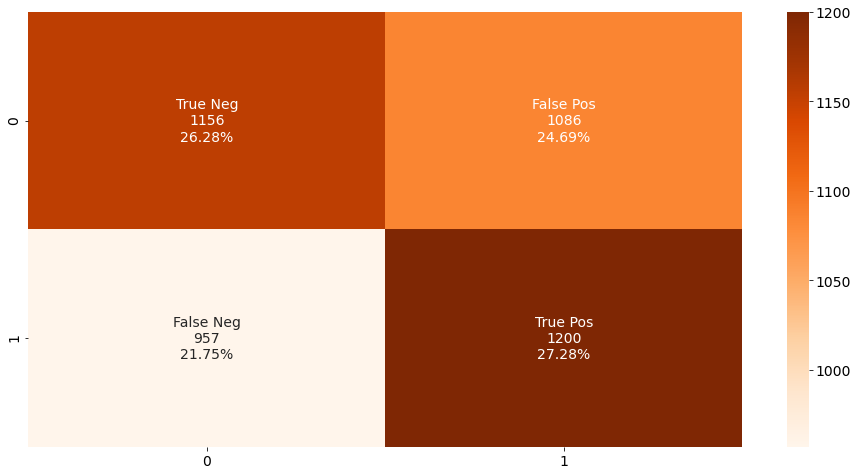

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53      2242
           1       0.52      0.56      0.54      2157

    accuracy                           0.54      4399
   macro avg       0.54      0.54      0.54      4399
weighted avg       0.54      0.54      0.54      4399



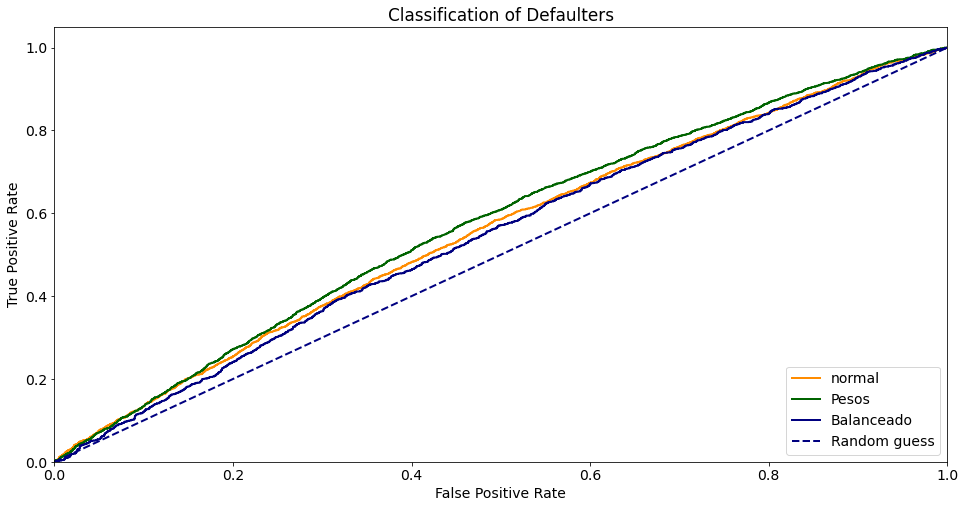

In [117]:
predict_p = model_1.predict(X_test1)
predict_2_p = modelo_pesos.predict(X_test2)
predict_3_p = modelo_balanceado.predict(X_test)

roc_p = roc_curve(y_test1, predict_p)
roc_2_p = roc_curve(y_test2, predict_2_p)
roc_3_p = roc_curve(y_test, predict_3_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'normal')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'Pesos')
plt.plot(roc_3_p[0], roc_3_p[1], color='navy',
         lw=line_width, label=f'Balanceado')

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [118]:

auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )
auc_3_p = auc(roc_3_p[0], roc_3_p[1])

print('AUC of Normal: ', auc_p)
print('AUC of the model pesos ', auc_2_p)
print('AUC of the model balanceado ', auc_3_p)

AUC of Normal:  0.5560203792097111
AUC of the model pesos  0.5724711797003845
AUC of the model balanceado  0.5459219965947022


## Model selection based on AUC scores

**Select the model with biggest AUC score**



In [119]:
AUC_scores =[auc_p, auc_2_p, auc_3_p]

In [120]:
indice_max_models = np.argmax(AUC_scores)

In [121]:
if indice_max_models == 0:
    print('Best model is Regresion Logistica Simple')
elif indice_max_models == 1:
    print('Best model is Regresion Logistica con Pesos')
else:
    print('Best model is Regresion Logistica Balanceada')

Best model is Regresion Logistica con Pesos


**Below we can see the variables that were take into account when running the previous models**

In [122]:
variables

['nparentes', 'indice_hacinamiento', 'puntaje_sisben_3']

In [123]:
categorias

['GENERO']

-------------------------------------

# Dash tables

In [124]:
indice_max_models

1

In [125]:
def aux_is_m(n):
    if n-1 == indice_max_models:
        val = 'Si'
    else:
        val = 'No'
    return val

In [133]:
tab1 =  model_1.params.to_frame().reset_index()
tab2 = modelo_pesos.params.to_frame().reset_index()
tab3 = modelo_balanceado.params.to_frame().reset_index()

tab = pd.concat([tab1,tab2,tab3], axis = 0)
tab = tab.reset_index()
tab.drop('level_0', inplace = True, axis = 1)
tab.rename(columns = {'index': 'variable'}, inplace = True)
tab.rename(columns = {0: 'coeff'}, inplace = True)

p1 = model_1.pvalues.to_frame().reset_index()
p2 = modelo_pesos.pvalues.to_frame().reset_index()
p3 = modelo_balanceado.pvalues.to_frame().reset_index()

pvals = pd.concat([p1,p2,p3], axis = 0)
pvals = pvals.reset_index()

pvals.drop('level_0', inplace = True, axis = 1)
pvals.drop('index', inplace = True, axis = 1)
pvals.rename(columns = {0: 'significative'}, inplace = True)
tab = pd.concat([tab,pvals], axis = 1)


tab['Anno'] = 2019
tab['nivel'] = 'Primaria'

m1 = ['Regresion Logistica Simple']*tab1.shape[0]
m1 = pd.Series(m1)

m2 = ['Regresión Logistica con Pesos']*tab2.shape[0]
m2 =  pd.Series(m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

m3 = ['Regresión Logistica Balanceada']*tab3.shape[0]
m3 = pd.Series(m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

m = pd.concat([m1,m2,m3], axis = 0)

tab['model'] = m

is_m1 =[aux_is_m(1)]*tab1.shape[0]
is_m1 = pd.Series(is_m1)

is_m2 = [aux_is_m(2)]*tab2.shape[0]
is_m2 =  pd.Series(is_m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

is_m3 = [aux_is_m(3)]*tab3.shape[0]
is_m3 = pd.Series(is_m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

is_m = pd.concat([is_m1,is_m2,is_m3], axis = 0)
tab['is_final_model'] = is_m
tab


,variable,coeff,significative,Anno,nivel,model,is_final_model
0,nparentes,-0.001374,9.136304e-01,2019,Primaria,Regresion Logistica Simple,No
1,indice_hacinamiento,0.047371,1.027612e-05,2019,Primaria,Regresion Logistica Simple,No
2,puntaje_sisben_3,-0.007470,1.004120e-14,2019,Primaria,Regresion Logistica Simple,No
3,const,-3.286129,0.000000e+00,2019,Primaria,Regresion Logistica Simple,No
4,GENERO_1,0.335705,5.926115e-31,2019,Primaria,Regresion Logistica Simple,No
5,nparentes,0.008761,6.216965e-01,2019,Primaria,Regresión Logistica con Pesos,Si
6,indice_hacinamiento,0.060885,1.262625e-04,2019,Primaria,Regresión Logistica con Pesos,Si
7,puntaje_sisben_3,-0.006581,1.592180e-06,2019,Primaria,Regresión Logistica con Pesos,Si
8,const,-0.129193,2.251548e-01,2019,Primaria,Regresión Logistica con Pesos,Si
9,GENERO_1,0.275190,1.381011e-11,2019,Primaria,Regresión Logistica con Pesos,Si


In [134]:
def aux_sig(x):
    if x < 0.05:
        val = 'Si'
    else:
        val = 'No'
    return val

In [135]:
tab['significative'] = tab['significative'].apply(aux_sig )

In [137]:
tab

,variable,coeff,significative,Anno,nivel,model,is_final_model
0,nparentes,-0.001374,No,2019,Primaria,Regresion Logistica Simple,No
1,indice_hacinamiento,0.047371,Si,2019,Primaria,Regresion Logistica Simple,No
2,puntaje_sisben_3,-0.007470,Si,2019,Primaria,Regresion Logistica Simple,No
3,const,-3.286129,Si,2019,Primaria,Regresion Logistica Simple,No
4,GENERO_1,0.335705,Si,2019,Primaria,Regresion Logistica Simple,No
5,nparentes,0.008761,No,2019,Primaria,Regresión Logistica con Pesos,Si
6,indice_hacinamiento,0.060885,Si,2019,Primaria,Regresión Logistica con Pesos,Si
7,puntaje_sisben_3,-0.006581,Si,2019,Primaria,Regresión Logistica con Pesos,Si
8,const,-0.129193,No,2019,Primaria,Regresión Logistica con Pesos,Si
9,GENERO_1,0.275190,Si,2019,Primaria,Regresión Logistica con Pesos,Si


In [138]:
tab.to_csv('../data/3-oro/t19p.csv')

In [130]:
# Modelo con pesos
modelo_pesos.params.to_frame().reset_index()

,index,0
0,nparentes,0.008761
1,indice_hacinamiento,0.060885
2,puntaje_sisben_3,-0.006581
3,const,-0.129193
4,GENERO_1,0.275190


In [131]:
# Modelo Balanceado
modelo_balanceado.params.to_frame().reset_index()

,index,0
0,nparentes,-0.000919
1,indice_hacinamiento,0.050842
2,puntaje_sisben_3,-0.008418
3,const,-0.019380
4,GENERO_1,0.340616


In [132]:
dict_fallo = {'f':0 'f'}

SyntaxError: invalid syntax (<ipython-input-132-c62b09edfb16>, line 1)

-----------------------------

# Models with all variables

### Model with all variables + Constant

In [139]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

In [140]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9
297,11,2,42.310001,3.5,129,28.2,0.457447,6,0.6,265.478873,0,3,14,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
298,9,3,55.910000,1.0,129,28.2,0.457447,6,0.6,265.478873,0,3,2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [141]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_cons, y, test_size=0.3)

In [142]:
model_all = sm.GLM(y_train_all, X_train_all, family=sm.families.Binomial()).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               134965
Model:                            GLM   Df Residuals:                   134906
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20565.
Date:                Thu, 07 Jul 2022   Deviance:                       41131.
Time:                        15:26:55   Pearson chi2:                 1.30e+05
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1259      0.009     14.307      0.000       0.109       0.143
estrato                       0.1157      0.028      4.159      0.000       0.061       0.170
puntaje_sisben_3             -0.0051      0.001     -4.882      0.000      -0.007      -0.003
indice_hacinamiento           0.0193      0.012      1.597      0.110      -0.004       0.043
TOTAL_EQUIPO_COMPUTO          0.0009      0.000      6.865      0.000       0.001       0.001
ALUMN_POR_DOCENTE             0.0192      0.004      4.432      0.000       0.011       0.028
COMPU_POR_ALUMN              -0.8870      0.231     -3.844      0.000      -1.339      -0.435
TOTAL_DOCENTES_CON_TITULO    -0.0052      0.001     -6.754      0.000      -0.007      -0.004
PROP_DOCENTES_CON_TITULO     -0.2354      0.072     -3.258      0.001      -0.377      -0.094
promepuntaje                  0.0021      0.001      1.589      0.112      -0.000       0.005
GRADO_OVERAGE                 0.0312      0.001     23.208      0.000       0.029       0.034
nparentes                     0.0121      0.012      0.997      0.319      -0.012       0.036
tpersona                      0.0445      0.008      5.555      0.000       0.029       0.060
const                        -7.6790      1.140     -6.739      0.000      -9.912      -5.445
GENERO_1                      0.2579      0.029      8.793      0.000       0.200       0.315
POB_VICT_CONF_1               0.0377      0.074      0.511      0.610      -0.107       0.182
PROVIENE_OTR_MUN_1           -0.0653      0.147     -0.444      0.657      -0.353       0.223
TIPO_DISCAPACIDAD_1          -0.4958      0.077     -6.456      0.000      -0.646      -0.345
CODIGO_ETNIA_1               -0.1791      0.285     -0.628      0.530      -0.738       0.380
CODIGO_ETNIA_2               -0.1829      0.291     -0.628      0.530      -0.754       0.388
CODIGO_ETNIA_3             4.399e-09   1.75e-05      0.000      1.000   -3.43e-05    3.43e-05
CODIGO_ETNIA_4              -19.9553   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
CODIGO_ETNIA_5               -0.4286      0.464     -0.924      0.355      -1.338       0.481
CODIGO_JORNADA_2              1.1636      0.311      3.739      0.000       0.554       1.774
CODIGO_JORNADA_3              0.9839      0.312      3.157      0.002       0.373       1.595
CODIGO_JORNADA_6              1.2271      0.313      3.924      0.000       0.614       1.840
DIR_NUM_LOCALIDAD_2           0.0983      0.399      0.247      0.805      -0.683       0.880
DIR_NUM_LOCALIDAD_3          -0.4483      0.230     -1.946      0.052      -0.900       0.003
DIR_NUM_LOCALIDAD_4           0.6285      0.120      5.223      0.000       0.393       0.864
DIR_NUM_LOCALIDAD_5           0.1038      0.121      0.859      0.390      

In [144]:
# Gets probabilities
y_probs_all = model_all.predict(X_test_all)

# Get TPR = True positive rate, FPR = False positive Rate and values to compare based on ROC_curves 
fpr, tpr, thresholds = roc_curve(y_test_all, y_probs_all)

# We establish Gmean maximun as criteria for optimazing tradeoff between errors of classification
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.036310, G-Mean=0.668


In [145]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [146]:
# We make our predictions based on theorical threshold
y_predict_all = y_probs_all.apply(classi)

In [147]:
# Get confusion matrix = Crosstab table of classifications
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_all, y_predict_all)
print(confusion_matrix)

[[34804 20884]
 [  618  1537]]


<AxesSubplot:>

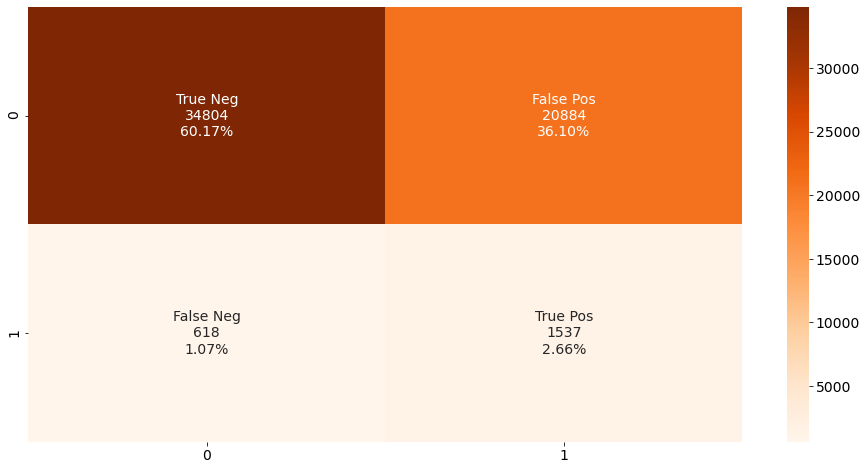

In [148]:
# Auxiliar Graph
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [149]:
# Final report
from sklearn.metrics import classification_report
print(classification_report(y_test_all, y_predict_all))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     55688
           1       0.07      0.71      0.13      2155

    accuracy                           0.63     57843
   macro avg       0.53      0.67      0.44     57843
weighted avg       0.95      0.63      0.74     57843



----------------------------

### Model with all variables with weights

In [150]:
# We set the value for weights accordingly to distribution of our data
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [151]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [152]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9
297,11,2,42.310001,3.5,129,28.2,0.457447,6,0.6,265.478873,0,3,14,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
298,9,3,55.910000,1.0,129,28.2,0.457447,6,0.6,265.478873,0,3,2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [153]:
from sklearn.model_selection import train_test_split
X_train_w_all, X_test_w_all, y_train_w_all, y_test_w_all = train_test_split(X_cons, y, test_size=0.3)

In [154]:
pesos = y_train_w_all.apply(pesos)

In [156]:
model_w_all = sm.GLM(y_train_w_all, X_train_w_all, family=sm.families.Binomial(), 
                     freq_weights=pesos).fit()
model_w_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               134965
Model:                            GLM   Df Residuals:                  9783.85
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6104.5
Date:                Thu, 07 Jul 2022   Deviance:                       12209.
Time:                        15:28:18   Pearson chi2:                 1.05e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1723      0.014     12.223      0.000       0.145       0.200
estrato                       0.1126      0.044      2.582      0.010       0.027       0.198
puntaje_sisben_3             -0.0053      0.002     -3.364      0.001      -0.008      -0.002
indice_hacinamiento           0.0235      0.019      1.236      0.216      -0.014       0.061
TOTAL_EQUIPO_COMPUTO          0.0010      0.000      4.702      0.000       0.001       0.001
ALUMN_POR_DOCENTE             0.0084      0.007      1.276      0.202      -0.004       0.021
COMPU_POR_ALUMN              -0.6874      0.356     -1.933      0.053      -1.385       0.010
TOTAL_DOCENTES_CON_TITULO    -0.0073      0.001     -5.795      0.000      -0.010      -0.005
PROP_DOCENTES_CON_TITULO     -0.1593      0.115     -1.388      0.165      -0.384       0.066
promepuntaje                  0.0034      0.002      1.740      0.082      -0.000       0.007
GRADO_OVERAGE                 0.0369      0.003     14.249      0.000       0.032       0.042
nparentes                     0.0079      0.019      0.414      0.679      -0.029       0.045
tpersona                      0.0578      0.013      4.487      0.000       0.033       0.083
const                       -25.5185   1.38e+04     -0.002      0.999   -2.71e+04    2.71e+04
GENERO_1                      0.2488      0.044      5.675      0.000       0.163       0.335
POB_VICT_CONF_1               0.1168      0.114      1.023      0.306      -0.107       0.341
PROVIENE_OTR_MUN_1           -0.3639      0.237     -1.539      0.124      -0.827       0.100
TIPO_DISCAPACIDAD_1          -0.0571      0.117     -0.488      0.626      -0.286       0.172
CODIGO_ETNIA_1                0.0529      0.391      0.135      0.892      -0.713       0.818
CODIGO_ETNIA_2               -0.1759      0.467     -0.377      0.706      -1.092       0.740
CODIGO_ETNIA_3              -19.6721   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
CODIGO_ETNIA_4              -20.4708   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
CODIGO_ETNIA_5               -0.5570      0.666     -0.836      0.403      -1.862       0.748
CODIGO_JORNADA_2              1.4884      0.430      3.460      0.001       0.645       2.331
CODIGO_JORNADA_3              1.2946      0.431      3.005      0.003       0.450       2.139
CODIGO_JORNADA_6              1.5295      0.433      3.534      0.000       0.681       2.378
DIR_NUM_LOCALIDAD_2           0.6896      0.427      1.613      0.107      -0.148       1.527
DIR_NUM_LOCALIDAD_3          -0.5184      0.309     -1.677      0.094      -1.124       0.087
DIR_NUM_LOCALIDAD_4           0.6315      0.167      3.778      0.000       0.304       0.959
DIR_NUM_LOCALIDAD_5           0.0481      0.166      0.290      0.772      

In [157]:
# Get probabilities of our predictions
y_probs_w_all = model_w_all.predict(X_test_w_all)

# Get fpr = False Positive Rate, tpr = True Positive Rate, we get roc curves
fpr, tpr, thresholds = roc_curve(y_test_w_all, y_probs_w_all)

# Optimize based on Gmeans of TPR*((1-FPR)) lower the FPR the better.
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.476263, G-Mean=0.676


In [158]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [159]:
# Make predictions based on thresholds
y_predict_w_all = y_probs_w_all.apply(classi)

In [160]:
# Get confussion matrix = Crosstab matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_w_all, y_predict_w_all)
print(confusion_matrix)

[[35203 20409]
 [  622  1609]]


<AxesSubplot:>

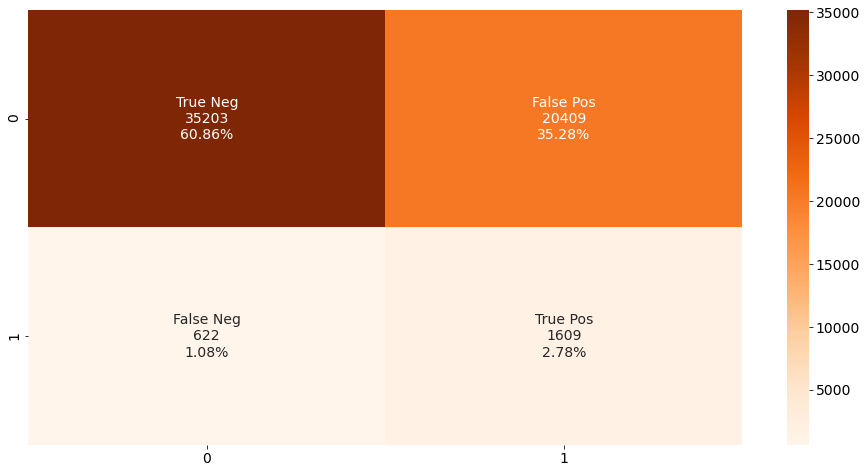

In [161]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test_w_all, y_predict_w_all))

              precision    recall  f1-score   support

           0       0.98      0.63      0.77     55612
           1       0.07      0.72      0.13      2231

    accuracy                           0.64     57843
   macro avg       0.53      0.68      0.45     57843
weighted avg       0.95      0.64      0.75     57843



## Model with all variables with balanced dataset

## A brief note on why not to use noramalization techniques

[Why not normalize yout data when fitting Logistic Regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)


[Regularization, standarization, normalization worsen model performance](https://www.turing.com/kb/effects-of-normalization-techniques-on-logistic-regression-in-data-science)

----------------------

### Conclusions